<a href="https://colab.research.google.com/github/sath8/Neural-Network-Labs/blob/main/CO542_LAB01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Task 01: Manual vs. Library Implementation of a Perceptron**

In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

**Step 1: Define the Dataset**

In [5]:
# Define input and output for the AND Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])


**Step 2: Manual Implementation of Perceptron**

In [ ]:

def step_function(x):
  return 1 if x >= 0 else 0
def perceptron_training(X, y, learning_rate=0.1, epochs=10):
  weights = np.zeros(X.shape[1])
  bias = 0
  for _ in range(epochs):
    for i in range(len(X)):
      activation = np.dot(X[i], weights) + bias
      prediction = step_function(activation)
      error = y[i] - prediction
      weights += learning_rate * error * X[i]
      bias += learning_rate * error
  return weights, bias
# Train manually
weights, bias = perceptron_training(X, y)
print("Manual Weights:", weights)
print("Manual Bias:", bias)

Manual Weights: [0.2 0.1]
Manual Bias: -0.20000000000000004


**Step 3: Ready-Made Implementation using sklearn**

In [ ]:

model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X, y)
print("Sklearn Weights:", model.coef_)
print("Sklearn Bias:", model.intercept_)


Sklearn Weights: [[0.2 0.2]]
Sklearn Bias: [-0.2]


**Step 4: Compare Results**

In [ ]:
# Predictions
manual_predictions = [step_function(np.dot(x, weights) + bias) for x in X]
sklearn_predictions = model.predict(X)
print("Manual Predictions:", manual_predictions)
print("Sklearn Predictions:", sklearn_predictions)


Manual Predictions: [0, 0, 0, 1]
Sklearn Predictions: [0 0 0 1]


**Questions**

● What are the similarities and differences between manual implementation and
Sklearn's model?


  The manual version uses a fixed number of epochs and explicitly updates weights and bias step by step, which helps in understanding how the algorithm works internally. On the other hand, scikit-learn’s implementation is more optimized and feature-rich—it automatically handles convergence using stopping criteria, manages learning rate schedules, and provides a cleaner interface for training and prediction. While both achieve the same goal, the library implementation is far more efficient and scalable for complex or large datasets.
  


● Why is it beneficial to use libraries like sklearn in practice?

  Using libraries like scikit-learn is beneficial in practice because they provide optimized, reliable, and easy-to-use implementations of complex machine learning algorithms. These libraries have been rigorously tested and are maintained by large communities, which significantly reduces the chances of errors that can occur in manual implementations. They also include many useful features such as automatic stopping conditions, data preprocessing tools, model evaluation metrics, and parameter tuning methods. This allows practitioners to build robust machine learning pipelines more quickly and focus on higher-level tasks such as model selection and performance analysis. In real-world applications where time, accuracy, and scalability matter, using such libraries ensures more professional and maintainable code.

# **Task 02: Logical Gate Classification**

**Step 1: Define the Dataset**

In [7]:
# Define input and output for the AND, OR, NOT Gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])
y_or = np.array([0, 1, 1, 1])
X_not = np.array([[1,0], [1,1]])
y_not = np.array([1, 0])

**Step 1: Train the Perceptron**

In [8]:
#AND
model_and = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model_and.fit(X, y_and)
#OR
model_or = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model_or.fit(X, y_or)

#NOT
model_not = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model_not.fit(X_not, y_not)

Perceptron(eta0=0.1, random_state=42)

**Step 2: Evaluate and Visualize**




1.   AND Gate




Accuracy: 1.0


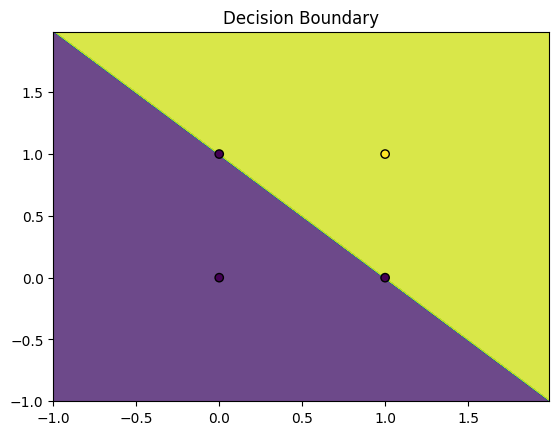

In [9]:
# Predictions
y_AND_pred = model_and.predict(X)
print("Accuracy:", accuracy_score(y_and, y_AND_pred))
# Decision Boundary Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min,y_max, 0.01))
Z = model_and.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_and, edgecolor='k')
plt.title("Decision Boundary")
plt.show()




2.   OR Gate



Accuracy: 1.0


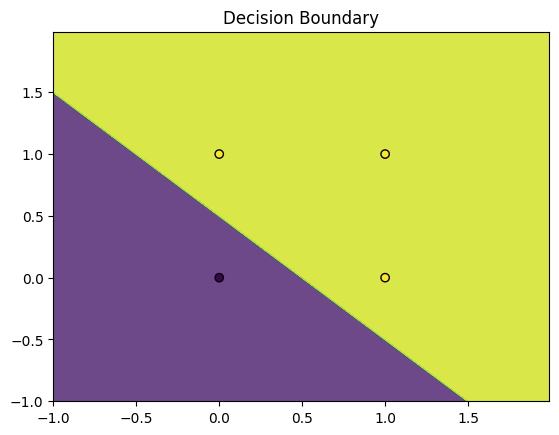

In [11]:
# Predictions
y_OR_pred = model_or.predict(X)
print("Accuracy:", accuracy_score(y_or, y_OR_pred))
# Decision Boundary Visualization

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min,y_max, 0.01))
Z = model_or.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y_or, edgecolor='k')
plt.title("Decision Boundary")
plt.show()



3. NOT Gate




Accuracy: 1.0


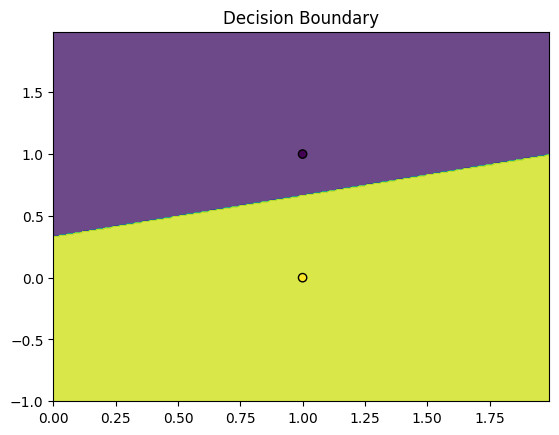

In [13]:
y_NOT_pred = model_not.predict(X_not)
print("Accuracy:", accuracy_score(y_not, y_NOT_pred))
x_min, x_max = X_not[:, 0].min() - 1, X_not[:, 0].max() + 1
y_min, y_max = X_not[:, 1].min() - 1, X_not[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min,y_max, 0.01))
Z = model_not.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_not[:, 0], X_not[:, 1], c=y_not, edgecolor='k')
plt.title("Decision Boundary")
plt.show()

**Questions**

● Why does a single-layer perceptron fail for certain logic gates and what are those
logic gates?

A single-layer perceptron can only solve problems that are linearly separable, meaning the output classes can be divided by a straight line (or a hyperplane in higher dimensions). Gates like AND, OR, and NOT are linearly separable, so a single-layer perceptron can learn them correctly. However, it fails to model the XOR gate, which is not linearly separable. In XOR, the output is 1 only when the inputs are different. No straight line can separate the 1s and 0s in XOR’s input space, which is why a single-layer perceptron cannot learn it. Solving XOR requires a multi-layer perceptron (MLP) with at least one hidden layer, enabling the model to capture non-linear patterns.



● How does adjusting the learning rate affect the perceptron’s performance?

The learning rate controls how much the weights are updated during training. If the learning rate is too low, training becomes very slow and might get stuck in suboptimal states, taking many epochs to converge. If it's too high, the model may overshoot the optimal weights, causing unstable learning and potentially failing to converge at all. A moderate learning rate like 0.1 is often a good starting point for small problems like logic gates. Ultimately, the learning rate affects convergence speed, training stability, and whether or not the perceptron finds a valid solution within the given number of epochs.



# **Task 03: Effect of Outliers on Training**

**Step 1: Generate Data**

In [14]:

# Generate two Gaussian distributions
class1 = np.random.multivariate_normal([2, 2], [[1, 0], [0, 1]], 100)
class2 = np.random.multivariate_normal([5, 5], [[1, 0], [0, 1]], 100)
# Add an outlier
class2 = np.vstack([class2, [10, 10]])
# Labels
X = np.vstack([class1, class2])
y = np.hstack([np.ones(100), -np.ones(101)])


**Step 2: Train the Perceptron**

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=42)

**Step 3: Evaluate**

In [16]:
import matplotlib.pyplot as plt
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9672131147540983


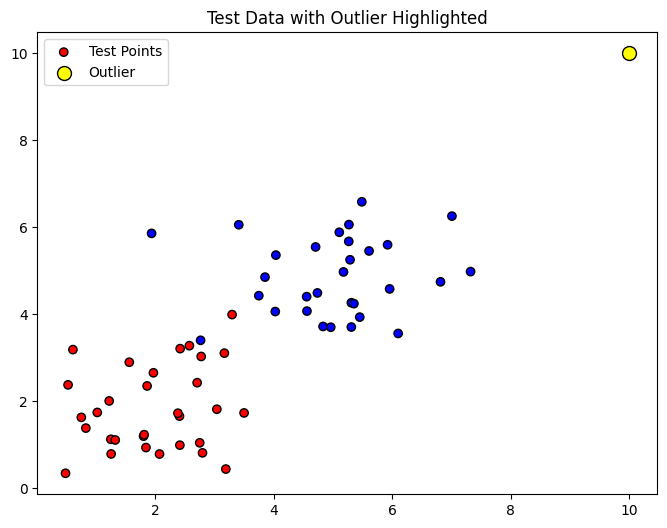

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolor='k', label='Test Points')
plt.scatter([10], [10], color='yellow', edgecolor='black', s=100, label='Outlier')  # Highlight outlier
plt.title("Test Data with Outlier Highlighted")
plt.legend()
plt.show()

**Questions**

● How does the presence of outliers affect training time and accuracy?

Outliers can significantly impact the performance of a perceptron by distorting the decision boundary, especially in linearly separable tasks. In this case, the added outlier at [10, 10] shifts the distribution of class 2 and causes the perceptron to misclassify points that would otherwise be correctly separated. This results in longer training time as the algorithm struggles to converge and can also decrease the overall accuracy on both training and test sets. The perceptron, being a simple linear model without mechanisms to handle such anomalies, ends up fitting to the outlier rather than the general trend of the data, making its predictions less reliable.

● What strategies can be used to mitigate the effect of outliers?

Several strategies can be employed to reduce the influence of outliers in perceptron training. One common method is data preprocessing, such as using statistical techniques to detect and remove or replace outliers before training. Another approach is to use robust learning algorithms that are less sensitive to extreme values, such as Support Vector Machines with soft margins or models with regularization. Additionally, feature scaling and dimensionality reduction techniques like PCA can help in minimizing the effect of distant points. Finally, assigning lower weights to suspected outliers during training or using ensemble methods that average multiple decision boundaries can also improve the model’s robustness.


# **Task 04: Real-World Classification**

**Step 1: Load the Dataset**

In [ ]:

digits = load_digits()
mask = (digits.target == 0) | (digits.target == 1)
X = digits.data[mask]
y = digits.target[mask]
scaler = StandardScaler()
X = scaler.fit_transform(X)


**Step 2: Train the Perceptron**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)
model = Perceptron(max_iter=1, eta0=0.1, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron(eta0=0.1, max_iter=1, random_state=42)

**Step 3: Evaluate Performance**

In [ ]:

y_pred = model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[56  0]
 [ 0 52]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        52

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



**Step 4: Visualize Confusion Matrix**

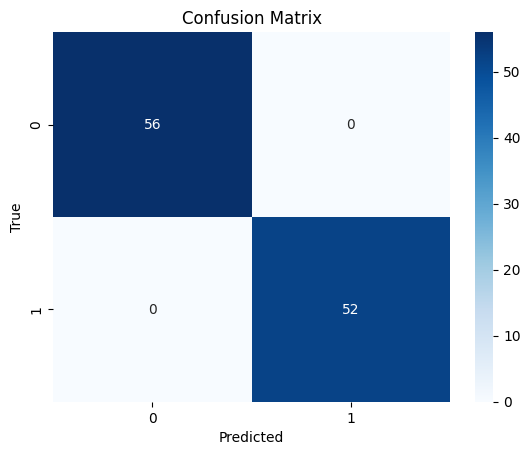

In [ ]:

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
cmap='Blues')
plt.title("Confusion Matrix");plt.xlabel("Predicted");plt.ylabel("True")
plt.show()


**Questions**

● What changes would you make to improve accuracy?

To improve accuracy in classifying handwritten digits using a single-layer perceptron, several enhancements can be considered. First, feature engineering or dimensionality reduction (using PCA) may help remove noise and emphasize informative pixel patterns. Second, tuning hyperparameters such as the learning rate (eta0) and increasing max_iter can lead to better convergence. Additionally, using a more complex model like a multi-layer perceptron (MLP) is a significant upgrade, as single-layer perceptrons can only solve linearly separable problems. Since image data may contain non-linear features, an MLP with hidden layers can capture more complex relationships. Lastly, implementing techniques such as cross-validation, data augmentation, or ensemble methods can further enhance generalization and robustness of the model.